# H3 - Univariate Linear Regression

- Student Name:王昊霖
- Student ID:2020141440041
- Deadline: 2022年03月21日 13:00
- Submit to：人工智能引论2022

In [1]:
# import necessary modules
from matplotlib import pyplot as plt
import torch

## data

In [2]:
x=[1.156762,2.624116,2.943006,2.499967,3.530516,4.045524,5.60725,5.784322,7.01605,8.304229,7.351775,8.799763,9.3467,10.232547,11.872116]
y=[3.949326,1.746431,9.902035,5.32671,10.569117,12.493749,14.531507,15.758228,12.235891,12.536069,19.349313,18.347272,18.812099,19.750414,24.672962]
x=torch.tensor(x)
y=torch.tensor(y)
print(x,y)

tensor([ 1.1568,  2.6241,  2.9430,  2.5000,  3.5305,  4.0455,  5.6073,  5.7843,
         7.0160,  8.3042,  7.3518,  8.7998,  9.3467, 10.2325, 11.8721]) tensor([ 3.9493,  1.7464,  9.9020,  5.3267, 10.5691, 12.4937, 14.5315, 15.7582,
        12.2359, 12.5361, 19.3493, 18.3473, 18.8121, 19.7504, 24.6730])


# univariate linear model

$a = w*x + b$

In [3]:
class UniLinearModel:
    def __init__(self, w=0.1, b=0.1):
        self.w, self.b = w, b
    
    def __call__(self, x):
        a = 0.
        #################
        ### Your Code Here
        #calculate a by using w and b
        a = w*x+b

        #################
        return a
    
    def update(self, w, b):
        self.w, self.b = w, b


## implement Least Squares Approximations

- step1: $\bar{x} = \frac{1}{m}\sum^{m}_{i=1}{x^{i}}$
- step2: $\bar{y} = \frac{1}{m}\sum^{m}_{i=1}{y^{i}}$
- step3: $w = \frac{\sum_{i=1}^{m}{y^{i}*x^{i}} - m \bar{y}* \bar{x}}{\sum_{i=1}^{m}{x^{i}*x^{i}} - m \bar{x}* \bar{x}}$
- step4: $b = \bar{y} - w * \bar{x}$

In [4]:
def uni_least_square(x, y):
    w, b = 1, 1
    #################
    ### Your Code Here

    # step 1: calculate mean of x
    x_ = torch.mean(x)

    # step 2: calculate mean of y
    y_ = torch.mean(y)

    # step 3: calculate w
    # step 3.1: calculate the sum of y^{i}*x^{i}
    sum_xy = sum(torch.mul(x,y))
    # step 3.2: calculate the sum of square of x^{i}
    sum_x =  sum(torch.mul(x,x))
    # step 3.3 calculate w
    m = len(x)
    w= (sum_xy-m*x_*y_)/(sum_x-m*x_**2)
    # step 4: calculate b   
    b = y_-w*x_
    #################
    return w, b

### Running

----------------------------------------
least square method: w=1.7924264669418335, b=2.444321632385254
----------------------------------------


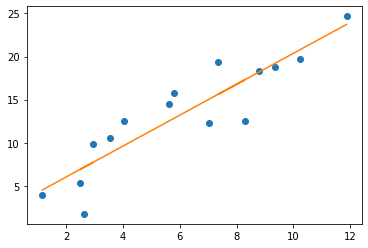

In [5]:

w, b = uni_least_square(x, y)
print("-"*40)
print("least square method: w={}, b={}".format(w, b))
print("-"*40)
model = UniLinearModel()
model.update(w, b)
a = [model(x_i) for x_i in x]

plt.figure()
plt.plot(x, y, 'o')
plt.plot(x, a, '-')

## implement grad descent algorithm for univariate lienear regression


- step 1: calculate a for each x : $a^{i} = w*x^{i} + b$
- step 2: calculate  $\frac{\partial J}{\partial w} =  \frac{1}{m}\sum_{i=1}^{m}{[(a^{i}-y^{i})*x^{i}}]$
- step 3: calculate  $\frac{\partial J}{\partial b} = \frac{1}{m}\sum_{i=1}^{m}{(a^{i}-y^{i})}$
- step 4: update w by:  $w \gets w - \alpha \frac{\partial J}{\partial w}$
- step 5: update b by:  $b \gets b - \alpha \frac{\partial J}{\partial b}$

### Gradent desent

In [6]:
def grad(model, x, y):
    grad_w, grad_b = 0, 0
    #################
    ### Your Code Here
    # step 1: calculate a for each x : $a^{i} = w*x^{i} + b$
    a=[model.w*x_i+model.b for x_i in x]
    m = len(a)
    # step 2: calculate  gradient of J with respect to w
    grad_w =sum([(a_i-y_i)*x_i for a_i,y_i,x_i in zip(a,y,x)])/m
    # step 3: calculate  gradient of J with respect to b
    grad_b =sum([a_i-y_i for a_i,y_i,x_i in zip(a,y,x)])/m
    #################
    return grad_w, grad_b

### Cost function

In [7]:
def cost(model, x, y):
    J = sum([(model(x_i)-y_i)**2 for x_i, y_i in zip(x, y)])/len(x)/2
    return J

### Training

----------------------------------------
gradient descent method: w=1.883414387702942, b=1.883414387702942
----------------------------------------


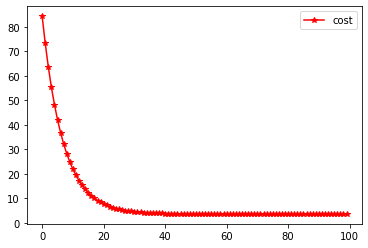

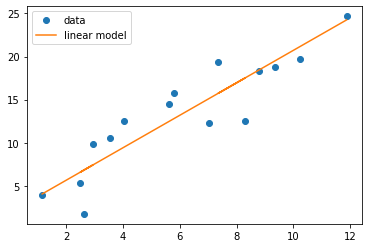

In [8]:
model = UniLinearModel()
epochs =100
lr = 0.01
Js = []

for epoch in range(epochs):
    w, b = model.w, model.b
    grad_w, grad_b = grad(model, x, y)
    #################
    ### Your Code Here
    w_next, b_next =lr*grad_b,lr*grad_b
    # step 4: update w 
    w-=w_next
    # step 5: update b 
    b-=b_next
    #step3: update linear model
    model.update(w, b)
    #################
    Js.append(cost(model, x, y))


plt.plot(Js,'r-*',label="cost")
plt.legend()
print("-"*40)
print("gradient descent method: w={}, b={}".format(w, b))
print("-"*40)    
    
a = [model(x_i) for x_i in x]

plt.figure()
plt.plot(x, y, 'o', label="data")
plt.plot(x, a, '-', label="linear model")
plt.legend()